# Proyek analisis trend pasar gadget

## Text Preprocessing

In [1]:
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
import nltk
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
namafile = 'dataset2023.csv'
data = pd.read_csv(namafile, sep=",", encoding='utf-8')
data.head()

,comment
0,Infinix Hot 30 Untuk 1&#39;5 Juta Sampai 2 Jut...
1,Recomentded hp guat ngontent bang 2jt an aja
2,Hp Made in kadrun ada gk ?
3,Review infinix GT 10 PRO dong vid
4,ada mau jual hp bagus tapi murah gak bang? soa...


In [3]:
data.isna().sum()

comment    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12337 entries, 0 to 12336
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  12337 non-null  object
dtypes: object(1)
memory usage: 96.5+ KB


In [5]:
data['comment'] = data['comment'].astype(str)
data['comment'] = data['comment'].str.lower()
data

,comment
0,infinix hot 30 untuk 1&#39;5 juta sampai 2 jut...
1,recomentded hp guat ngontent bang 2jt an aja
2,hp made in kadrun ada gk ?
3,review infinix gt 10 pro dong vid
4,ada mau jual hp bagus tapi murah gak bang? soa...
...,...
12332,1
12333,wew
12334,halo first
12335,mending mi13t atau mi 12 pro blo.?


In [6]:
def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
data['comment'] = data['comment'].apply(remove_links)

#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

data['comment'] = data['comment'].apply(remove_number)

#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['comment'] = data['comment'].apply(remove_punctuation)

# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

data['comment'] = data['comment'].apply(remove_singl_char)

In [7]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['comment_tokenize'] = data['comment'].apply(word_tokenize_wrapper)
data

,comment,comment_tokenize
0,infinix hot untuk juta sampai jutaan i...,"[infinix, hot, untuk, juta, sampai, jutaan, in..."
1,recomentded hp guat ngontent bang jt an aja,"[recomentded, hp, guat, ngontent, bang, jt, an..."
2,hp made in kadrun ada gk,"[hp, made, in, kadrun, ada, gk]"
3,review infinix gt pro dong vid,"[review, infinix, gt, pro, dong, vid]"
4,ada mau jual hp bagus tapi murah gak bang soal...,"[ada, mau, jual, hp, bagus, tapi, murah, gak, ..."
...,...,...
12332,,[]
12333,wew,[wew]
12334,halo first,"[halo, first]"
12335,mending mi atau mi pro blo,"[mending, mi, atau, mi, pro, blo]"


In [8]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

comment_fqsist = data['comment_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(comment_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(gb, 4), (infinix, 2), (hot, 2), (juta, 2), (...
1    [(recomentded, 1), (hp, 1), (guat, 1), (ngonte...
2    [(hp, 1), (made, 1), (in, 1), (kadrun, 1), (ad...
3    [(review, 1), (infinix, 1), (gt, 1), (pro, 1),...
4    [(bang, 3), (hp, 2), (ada, 1), (mau, 1), (jual...
Name: comment_tokenize, dtype: object


In [9]:
slank_word_dict = {
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    "ip": "iphone",
    "realmi": "realme",
    "relmi": "realme",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [10]:
normalizad_word = pd.read_csv("kamus_alay.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [11]:
data['comment_normalized'] = data['comment_tokenize'].apply(normalized_term).apply(slank_normalized_term)
data['comment_normalized'] = data['comment_tokenize'].apply(slank_normalized_term)
data

,comment,comment_tokenize,comment_normalized
0,infinix hot untuk juta sampai jutaan i...,"[infinix, hot, untuk, juta, sampai, jutaan, in...","[infinix, hot, untuk, juta, sampai, jutaan, in..."
1,recomentded hp guat ngontent bang jt an aja,"[recomentded, hp, guat, ngontent, bang, jt, an...","[recomentded, hp, guat, ngontent, bang, jt, an..."
2,hp made in kadrun ada gk,"[hp, made, in, kadrun, ada, gk]","[hp, made, in, kadrun, ada, gk]"
3,review infinix gt pro dong vid,"[review, infinix, gt, pro, dong, vid]","[review, infinix, gt, pro, dong, vid]"
4,ada mau jual hp bagus tapi murah gak bang soal...,"[ada, mau, jual, hp, bagus, tapi, murah, gak, ...","[ada, mau, jual, hp, bagus, tapi, murah, tidak..."
...,...,...,...
12332,,[],[]
12333,wew,[wew],[wew]
12334,halo first,"[halo, first]","[halo, first]"
12335,mending mi atau mi pro blo,"[mending, mi, atau, mi, pro, blo]","[mending, mi, atau, mi, pro, blo]"


In [12]:
list_stopwords = stopwords.words('indonesian')

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['comment_stop_removed'] = data['comment_normalized'].apply(stopwords_removal) 

data

,comment,comment_tokenize,comment_normalized,comment_stop_removed
0,infinix hot untuk juta sampai jutaan i...,"[infinix, hot, untuk, juta, sampai, jutaan, in...","[infinix, hot, untuk, juta, sampai, jutaan, in...","[infinix, hot, juta, jutaan, infinix, hot, ste..."
1,recomentded hp guat ngontent bang jt an aja,"[recomentded, hp, guat, ngontent, bang, jt, an...","[recomentded, hp, guat, ngontent, bang, jt, an...","[recomentded, hp, guat, ngontent, bang, jt, an..."
2,hp made in kadrun ada gk,"[hp, made, in, kadrun, ada, gk]","[hp, made, in, kadrun, ada, gk]","[hp, made, in, kadrun, gk]"
3,review infinix gt pro dong vid,"[review, infinix, gt, pro, dong, vid]","[review, infinix, gt, pro, dong, vid]","[review, infinix, gt, pro, vid]"
4,ada mau jual hp bagus tapi murah gak bang soal...,"[ada, mau, jual, hp, bagus, tapi, murah, gak, ...","[ada, mau, jual, hp, bagus, tapi, murah, tidak...","[jual, hp, bagus, murah, bang, soalny, skrng, ..."
...,...,...,...,...
12332,,[],[],[]
12333,wew,[wew],[wew],[wew]
12334,halo first,"[halo, first]","[halo, first]","[halo, first]"
12335,mending mi atau mi pro blo,"[mending, mi, atau, mi, pro, blo]","[mending, mi, atau, mi, pro, blo]","[mending, mi, mi, pro, blo]"


In [13]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['comment_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['comment_Stemmed'] = data['comment_stop_removed'].swifter.apply(get_stemmed_term)
data

10917
------------------------
infinix : infinix
hot : hot
juta : juta
jutaan : juta
stereo : stereo
speaker : speaker
kamera : kamera
mp : mp
selfi : selfi
punch : punch
hol : hol
design : design
oke : oke
bgt : bgt
harga : harga
udah : udah
dapet : dapet
ram : ram
gb : gb
storage : storage
variant : variant
recomentded : recomentded
hp : hp
guat : guat
ngontent : ngontent
bang : bang
jt : jt
an : an
aja : aja
made : made
in : in
kadrun : kadrun
gk : gk
review : review
gt : gt
pro : pro
vid : vid
jual : jual
bagus : bagus
murah : murah
soalny : soalny
skrng : skrng
butuh : butuh
budget : budget
nya : nya
mati : mati
total : total
karna : karna
pemakaian : pakai
konsepnya : konsep
bangm : bangm
tdk : tdk
memaksakan : paksa
klo : klo
yg : yg
msh : msh
ttp : ttp
pixel : pixel
masuk : masuk
ya : ya
mending : mending
redmi : redmi
poco : poco
dri : dri
mna : mna
dpn : dpn
blkng : blkng
ny : ny
pling : pling
bgs : bgs
kak : kak
wow : wow
itel : itel
si : si
penghancur : hancur
pasar : pasar

Pandas Apply:   0%|          | 0/12337 [00:00<?, ?it/s]

,comment,comment_tokenize,comment_normalized,comment_stop_removed,comment_Stemmed
0,infinix hot untuk juta sampai jutaan i...,"[infinix, hot, untuk, juta, sampai, jutaan, in...","[infinix, hot, untuk, juta, sampai, jutaan, in...","[infinix, hot, juta, jutaan, infinix, hot, ste...","[infinix, hot, juta, juta, infinix, hot, stere..."
1,recomentded hp guat ngontent bang jt an aja,"[recomentded, hp, guat, ngontent, bang, jt, an...","[recomentded, hp, guat, ngontent, bang, jt, an...","[recomentded, hp, guat, ngontent, bang, jt, an...","[recomentded, hp, guat, ngontent, bang, jt, an..."
2,hp made in kadrun ada gk,"[hp, made, in, kadrun, ada, gk]","[hp, made, in, kadrun, ada, gk]","[hp, made, in, kadrun, gk]","[hp, made, in, kadrun, gk]"
3,review infinix gt pro dong vid,"[review, infinix, gt, pro, dong, vid]","[review, infinix, gt, pro, dong, vid]","[review, infinix, gt, pro, vid]","[review, infinix, gt, pro, vid]"
4,ada mau jual hp bagus tapi murah gak bang soal...,"[ada, mau, jual, hp, bagus, tapi, murah, gak, ...","[ada, mau, jual, hp, bagus, tapi, murah, tidak...","[jual, hp, bagus, murah, bang, soalny, skrng, ...","[jual, hp, bagus, murah, bang, soalny, skrng, ..."
...,...,...,...,...,...
12332,,[],[],[],[]
12333,wew,[wew],[wew],[wew],[wew]
12334,halo first,"[halo, first]","[halo, first]","[halo, first]","[halo, first]"
12335,mending mi atau mi pro blo,"[mending, mi, atau, mi, pro, blo]","[mending, mi, atau, mi, pro, blo]","[mending, mi, mi, pro, blo]","[mending, mi, mi, pro, blo]"


In [14]:
data["comment_clean"] = [' '.join(map(str, l)) for l in data['comment_Stemmed']]
data

,comment,comment_tokenize,comment_normalized,comment_stop_removed,comment_Stemmed,comment_clean
0,infinix hot untuk juta sampai jutaan i...,"[infinix, hot, untuk, juta, sampai, jutaan, in...","[infinix, hot, untuk, juta, sampai, jutaan, in...","[infinix, hot, juta, jutaan, infinix, hot, ste...","[infinix, hot, juta, juta, infinix, hot, stere...",infinix hot juta juta infinix hot stereo speak...
1,recomentded hp guat ngontent bang jt an aja,"[recomentded, hp, guat, ngontent, bang, jt, an...","[recomentded, hp, guat, ngontent, bang, jt, an...","[recomentded, hp, guat, ngontent, bang, jt, an...","[recomentded, hp, guat, ngontent, bang, jt, an...",recomentded hp guat ngontent bang jt an aja
2,hp made in kadrun ada gk,"[hp, made, in, kadrun, ada, gk]","[hp, made, in, kadrun, ada, gk]","[hp, made, in, kadrun, gk]","[hp, made, in, kadrun, gk]",hp made in kadrun gk
3,review infinix gt pro dong vid,"[review, infinix, gt, pro, dong, vid]","[review, infinix, gt, pro, dong, vid]","[review, infinix, gt, pro, vid]","[review, infinix, gt, pro, vid]",review infinix gt pro vid
4,ada mau jual hp bagus tapi murah gak bang soal...,"[ada, mau, jual, hp, bagus, tapi, murah, gak, ...","[ada, mau, jual, hp, bagus, tapi, murah, tidak...","[jual, hp, bagus, murah, bang, soalny, skrng, ...","[jual, hp, bagus, murah, bang, soalny, skrng, ...",jual hp bagus murah bang soalny skrng butuh bu...
...,...,...,...,...,...,...
12332,,[],[],[],[],
12333,wew,[wew],[wew],[wew],[wew],wew
12334,halo first,"[halo, first]","[halo, first]","[halo, first]","[halo, first]",halo first
12335,mending mi atau mi pro blo,"[mending, mi, atau, mi, pro, blo]","[mending, mi, atau, mi, pro, blo]","[mending, mi, mi, pro, blo]","[mending, mi, mi, pro, blo]",mending mi mi pro blo


In [15]:
data = data[['comment_clean']]
data

,comment_clean
0,infinix hot juta juta infinix hot stereo speak...
1,recomentded hp guat ngontent bang jt an aja
2,hp made in kadrun gk
3,review infinix gt pro vid
4,jual hp bagus murah bang soalny skrng butuh bu...
...,...
12332,
12333,wew
12334,halo first
12335,mending mi mi pro blo


In [16]:
# Hapus NaN
data = data.dropna(subset=['comment_clean'])

# Pastikan isinya adalah string dan bukan string kosong
data = data[data['comment_clean'].apply(lambda x: isinstance(x, str) and x.strip() != "")]


In [17]:
data

,comment_clean
0,infinix hot juta juta infinix hot stereo speak...
1,recomentded hp guat ngontent bang jt an aja
2,hp made in kadrun gk
3,review infinix gt pro vid
4,jual hp bagus murah bang soalny skrng butuh bu...
...,...
12328,halo bang
12333,wew
12334,halo first
12335,mending mi mi pro blo


In [18]:
data.to_csv("datagabung.csv")

## Memberi Label

In [19]:
import pandas as pd
namafile = 'datagabung.csv'
data_1 = pd.read_csv(namafile, sep=",", encoding='utf-8')
data_1.head()

,Unnamed: 0,comment_clean
0,0,infinix hot juta juta infinix hot stereo speak...
1,1,recomentded hp guat ngontent bang jt an aja
2,2,hp made in kadrun gk
3,3,review infinix gt pro vid
4,4,jual hp bagus murah bang soalny skrng butuh bu...


In [20]:
data_1 = data_1[['comment_clean']]
data_1

,comment_clean
0,infinix hot juta juta infinix hot stereo speak...
1,recomentded hp guat ngontent bang jt an aja
2,hp made in kadrun gk
3,review infinix gt pro vid
4,jual hp bagus murah bang soalny skrng butuh bu...
...,...
12092,halo bang
12093,wew
12094,halo first
12095,mending mi mi pro blo


In [21]:
# Hapus NaN
data_1 = data_1.dropna(subset=['comment_clean'])

# Pastikan isinya adalah string dan bukan string kosong
data = data_1[data_1['comment_clean'].apply(lambda x: isinstance(x, str) and x.strip() != "")]
data



,comment_clean
0,infinix hot juta juta infinix hot stereo speak...
1,recomentded hp guat ngontent bang jt an aja
2,hp made in kadrun gk
3,review infinix gt pro vid
4,jual hp bagus murah bang soalny skrng butuh bu...
...,...
12092,halo bang
12093,wew
12094,halo first
12095,mending mi mi pro blo


In [22]:
# Daftar kata kunci untuk setiap genre
daftar_kata_kunci = {
    "xiaomi": ["xiaomi", "redmi", "poco"],
    "samsung": ["samsung", "galaxy"],
    "infinix": ["infinix"],
    "realme": ["realme"],
    "vivo": ["vivo"],
    "iqoo": ["iqoo"],
    "tecno": ["tecno"],
    "oppo": ["oppo"],
    "asus": ["asus", "zenfone"],
    "itel": ["itel"]
}

# Fungsi untuk memberi label pada setiap baris komentar
def label_komentar(comment_clean):
    label = []
    for genre, kata_kunci in daftar_kata_kunci.items():
        if any(kata in comment_clean.lower() for kata in kata_kunci):
            label.append(genre)
    if not label:
        label.append("lainnya")  # Tambahkan label "lainnya" jika tidak ada kunci yang cocok
    return ', '.join(label)  # Menggabungkan label tanpa tanda kurung dan dipisahkan dengan koma

# Memberi label pada setiap baris komentar dalam dataset
data["Label"] = data["comment_clean"].apply(label_komentar)

# menghapus label yang tidak perlu
data = data.drop(data[data['Label'] == 'lainnya'].index)
data = data.reset_index(drop=True)

In [23]:
data

,comment_clean,Label
0,infinix hot juta juta infinix hot stereo speak...,infinix
1,review infinix gt pro vid,infinix
2,mending redmi poco,xiaomi
3,wow itel si hancur harga pasar muncul,itel
4,bagus kamera samsung samsung yaa,samsung
...,...,...
5108,assalamu alaikum bg yg nex redmi not,xiaomi
5109,infinix hot bagus kah bang,infinix
5110,iphone or samsung,samsung
5111,xiaomi hp idam gua,xiaomi


In [24]:
print(data['Label'].unique())

['infinix' 'xiaomi' 'itel' 'samsung' 'realme' 'xiaomi, vivo'
 'xiaomi, realme' 'vivo' 'iqoo' 'xiaomi, samsung' 'oppo' 'samsung, realme'
 'realme, vivo' 'xiaomi, samsung, infinix, realme' 'samsung, vivo'
 'vivo, iqoo' 'samsung, oppo' 'tecno' 'xiaomi, samsung, realme, tecno'
 'infinix, itel' 'xiaomi, samsung, infinix, realme, vivo, iqoo, tecno'
 'samsung, infinix, vivo'
 'xiaomi, samsung, infinix, realme, vivo, iqoo, tecno, oppo'
 'xiaomi, infinix, realme' 'xiaomi, samsung, vivo' 'samsung, tecno' 'asus'
 'infinix, tecno' 'xiaomi, iqoo' 'samsung, infinix, vivo, oppo'
 'xiaomi, asus' 'xiaomi, vivo, oppo'
 'xiaomi, samsung, infinix, realme, vivo, iqoo, tecno, oppo, asus'
 'xiaomi, samsung, realme' 'xiaomi, samsung, vivo, iqoo'
 'xiaomi, samsung, iqoo' 'xiaomi, infinix' 'xiaomi, realme, tecno'
 'infinix, vivo' 'xiaomi, tecno' 'vivo, iqoo, tecno' 'vivo, oppo'
 'realme, itel' 'xiaomi, infinix, tecno'
 'xiaomi, samsung, infinix, realme, vivo, iqoo' 'infinix, realme'
 'realme, tecno' 'xiaomi, in

In [25]:
# Filter hanya baris yang label-nya tidak mengandung koma
data_label = data[~data['Label'].str.contains(',')]


In [26]:
data_label

,comment_clean,Label
0,infinix hot juta juta infinix hot stereo speak...,infinix
1,review infinix gt pro vid,infinix
2,mending redmi poco,xiaomi
3,wow itel si hancur harga pasar muncul,itel
4,bagus kamera samsung samsung yaa,samsung
...,...,...
5108,assalamu alaikum bg yg nex redmi not,xiaomi
5109,infinix hot bagus kah bang,infinix
5110,iphone or samsung,samsung
5111,xiaomi hp idam gua,xiaomi


In [27]:
data_label = data_label.reset_index(drop=True)
data_label

,comment_clean,Label
0,infinix hot juta juta infinix hot stereo speak...,infinix
1,review infinix gt pro vid,infinix
2,mending redmi poco,xiaomi
3,wow itel si hancur harga pasar muncul,itel
4,bagus kamera samsung samsung yaa,samsung
...,...,...
4538,assalamu alaikum bg yg nex redmi not,xiaomi
4539,infinix hot bagus kah bang,infinix
4540,iphone or samsung,samsung
4541,xiaomi hp idam gua,xiaomi


In [28]:
print(data_label['Label'].unique())


['infinix' 'xiaomi' 'itel' 'samsung' 'realme' 'vivo' 'iqoo' 'oppo' 'tecno'
 'asus']


In [29]:
data_label.isna().sum()

comment_clean    0
Label            0
dtype: int64

In [30]:
data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   comment_clean  4543 non-null   object
 1   Label          4543 non-null   object
dtypes: object(2)
memory usage: 71.1+ KB


## Analisis dan Visualisasi Data

Jumlah tiap label:
Label
xiaomi     1912
samsung     770
infinix     521
realme      360
vivo        233
iqoo        215
tecno       189
oppo        162
asus         93
itel         88
Name: count, dtype: int64


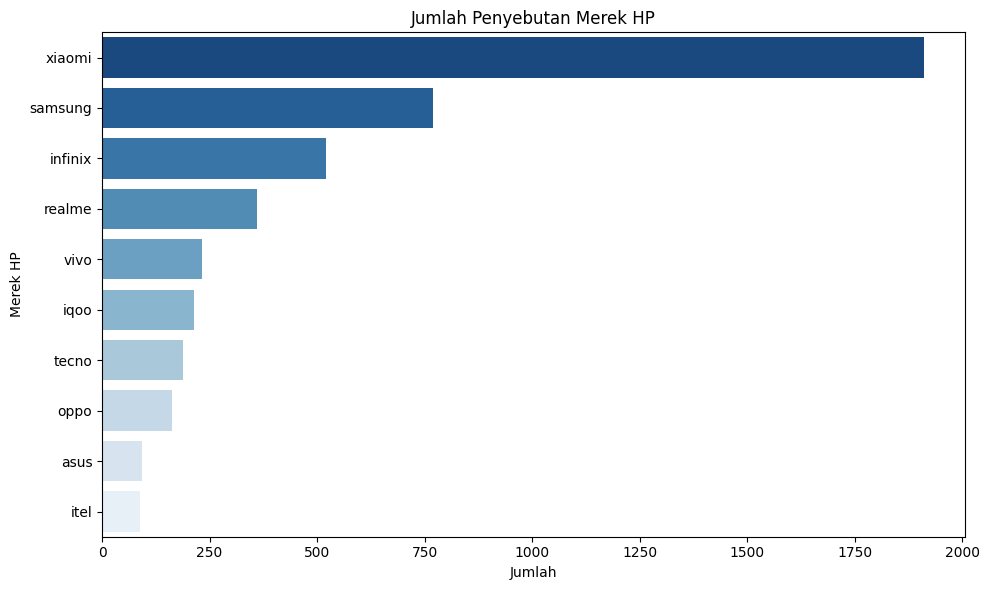

In [31]:
# Hitung frekuensi tiap label
label_counts = data_label['Label'].value_counts()

# Tampilkan jumlahnya
print("Jumlah tiap label:")
print(label_counts)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.values, y=label_counts.index, palette='Blues_r')
plt.title('Jumlah Penyebutan Merek HP')
plt.xlabel('Jumlah')
plt.ylabel('Merek HP')
plt.tight_layout()
plt.show()